# 0 The objective of this notebook is to train and test some ML models to achieve our 73% accuracy metric 

We only want to focus on the dissatisfied clients, so we can identify the problems here. So, we will aim for the metric that cares about the negatives outcomes 0.
For this, we will focus on the specificity

 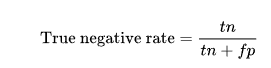




As we could see, the version of data that gave us the best metrics were base_v1

In [16]:
#---------Importing libraries---------#

#---Data analysis---#
import pandas as pd
import numpy as np


#---Data splitting---#
from sklearn.model_selection import train_test_split

#---classification models---#
from sklearn.linear_model import LogisticRegression

#---evaluation---#
from sklearn.metrics import accuracy_score, classification_report

#---utils---#
import os

#---data---#
df = pd.read_csv('data/base_v1.csv')


#---------Models---------#
#emsemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC


In [5]:
#splitting data into 80% train and 20% test
X = df.drop(columns=['Y'])
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.shape

(109, 7)

# 1 Trying different and more complex models

In [19]:
def modeling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('Accuracy: {:.2%}'.format(accuracy_score(y_test, y_pred)))

## 1.0 Ridge Regression classifier



In [20]:
modeling(RidgeClassifier(random_state=42), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.71      0.83      0.77        12

    accuracy                           0.73        22
   macro avg       0.73      0.72      0.72        22
weighted avg       0.73      0.73      0.72        22

Accuracy: 72.73%


## 1.1 XGBoost

In [21]:
modeling(XGBClassifier(random_state=42), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.62      0.67      0.64        12

    accuracy                           0.59        22
   macro avg       0.59      0.58      0.58        22
weighted avg       0.59      0.59      0.59        22

Accuracy: 59.09%


## 1.2 RandomForest

In [22]:
modeling(RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.67      0.67      0.67        12

    accuracy                           0.64        22
   macro avg       0.63      0.63      0.63        22
weighted avg       0.64      0.64      0.64        22

Accuracy: 63.64%


## 1.3 SVM

In [23]:
modeling(SVC(random_state=42), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.69      0.92      0.79        12

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.71        22
weighted avg       0.75      0.73      0.71        22

Accuracy: 72.73%


# 2 Hyperparameter tuning